# Data Preprocessing & EDA

## Attaching Resources

### Importing Necessary Libraries

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [3]:
book_raw = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Book_Recommendation/main/resources/Books.csv', encoding='latin-1')

book_raw.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings_raw = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Book_Recommendation/main/resources/Ratings.csv', encoding='latin-1')

ratings_raw.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users_raw = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Book_Recommendation/main/resources/Users.csv', encoding='latin-1')

users_raw.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings = pd.read_excel('https://raw.githubusercontent.com/kunal-mallick/Book_Recommendation/main/resources/Ratings.xlsx')

ratings

,Unnamed: 0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,rating
0,0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0.000000
1,1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,4.928571
2,2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,5.000000
3,3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,4.272727
4,4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,0.000000
...,...,...,...,...,...,...,...
271357,271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),7.000000
271358,271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,4.000000
271359,271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,0.000000
271360,271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,0.000000


## Performing EDA In Dataset

### Performing Data Preprocessing

#### Applying Descriptive Statistics

In [7]:
book_raw.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [8]:
ratings_raw.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [9]:
users_raw.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


#### Performing Typecasting

In [10]:
book_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
ratings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
users_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Performing Missing Value Imputation

In [13]:
def missing_percentage(wp):

    m = wp.isna().sum()
    total = int(wp.shape[0])

    for i in range(len(wp.columns)):
        percentage =round((m[i]/total)*100)

        print(str(wp.columns[i]) + ' has ' + str(percentage) + ' % missing value(' + str(m[i]) + ')')

##### Missing Value Percentage

In [14]:
missing_percentage(book_raw)

ISBN has 0 % missing value(0)
Book-Title has 0 % missing value(0)
Book-Author has 0 % missing value(1)
Year-Of-Publication has 0 % missing value(0)
Publisher has 0 % missing value(2)
Image-URL-S has 0 % missing value(0)
Image-URL-M has 0 % missing value(0)
Image-URL-L has 0 % missing value(3)


In [15]:
missing_percentage(ratings_raw)

User-ID has 0 % missing value(0)
ISBN has 0 % missing value(0)
Book-Rating has 0 % missing value(0)


In [16]:
missing_percentage(users_raw)

User-ID has 0 % missing value(0)
Location has 0 % missing value(0)
Age has 40 % missing value(110762)


In [17]:
missing_percentage(ratings)

Unnamed: 0 has 0 % missing value(0)
ISBN has 0 % missing value(0)
Book-Title has 0 % missing value(4)
Book-Author has 0 % missing value(2)
Year-Of-Publication has 0 % missing value(0)
Publisher has 0 % missing value(2)
rating has 0 % missing value(1209)


##### Removing Missing Value

In [29]:
ratings.dropna(inplace = True)

##### Missing Value Percentage(After)

In [30]:
missing_percentage(ratings)

Unnamed: 0 has 0 % missing value(0)
ISBN has 0 % missing value(0)
Book-Title has 0 % missing value(0)
Book-Author has 0 % missing value(0)
Year-Of-Publication has 0 % missing value(0)
Publisher has 0 % missing value(0)
rating has 0 % missing value(0)


#### Finding Unique Values In Dataset

In [19]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [20]:
uni(ratings_raw)


 All Unique Value in User-ID
[     2      7      8 ... 278851 278852 278854]
Total no of unique values 105283

 All Unique Value in ISBN
[' 0330299891' ' 0375404120' ' 0586045007' ... '§423350229' '´3499128624'
 'Ô½crosoft']
Total no of unique values 340556

 All Unique Value in Book-Rating
[ 0  1  2  3  4  5  6  7  8  9 10]
Total no of unique values 11


In [21]:
uni(users_raw)


 All Unique Value in User-ID
[     1      2      3 ... 278856 278857 278858]
Total no of unique values 278858

 All Unique Value in Location
['&#19978;&#28023;, shanghai, china'
 '&#19978;&#28023;/&#21488;&#24030;/&#36335;&#26725;, alberta, china'
 '&#20013;&#22269;&#24191;&#19996;&#30465;&#24265;&#27743;&#24066;, florida, china'
 ... 'ýzmir, connecticut, turkey' 'ýzmir, n/a, turkey'
 'ýzmýr, n/a, turkey']
Total no of unique values 57339

 All Unique Value in Age
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104

### Checking for Duplicated Values

In [22]:
book_raw[book_raw.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [23]:
ratings_raw[ratings_raw.duplicated()]

,User-ID,ISBN,Book-Rating


In [24]:
users_raw[users_raw.duplicated()]

,User-ID,Location,Age


In [25]:
ratings[ratings.duplicated()]

,Unnamed: 0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,rating
20000,19999,312289510,The Christmas Shoes,Donna VanLiere,2001,St. Martin's Press,3.827586
30001,29999,967205905,Effort-Less Marketing for Financial Advisors,Steve Moeller,1999,American Business Visions,0.000000


In [26]:
ratings.drop_duplicates(inplace = True)

In [27]:
ratings[ratings.duplicated()]

,Unnamed: 0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,rating


- There is no duplicate vale in are dataset

### Visualizing The Data

#### Visualizing User

In [56]:
loc = []

for i in range(len(users_raw['Location'])):

    msg = re.sub('[^a-zA-Z,]',' ',users_raw['Location'][i])
    loc.append(msg)

In [42]:
location = []

for i in range(len(loc)):
    txt = loc[i].split(',')
    location.append(txt)

place = pd.DataFrame(location, columns=['a','b','c','d','e','f','g','h','i'])

place

,a,b,c,d,e,f,g,h,i
0,nyc,new york,usa,None,None,None,None,None,None
1,stockton,california,usa,None,None,None,None,None,None
2,moscow,yukon territory,russia,None,None,None,None,None,None
3,porto,v n gaia,portugal,None,None,None,None,None,None
4,farnborough,hants,united kingdom,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
278853,portland,oregon,usa,None,None,None,None,None,None
278854,tacoma,washington,united kingdom,None,None,None,None,None,None
278855,brampton,ontario,canada,None,None,None,None,None,None
278856,knoxville,tennessee,usa,None,None,None,None,None,None


In [43]:
user_loc = pd.DataFrame({
    'User-ID' : users_raw['User-ID'],
    'area' : place['a'],
    'city' : place['b'],
    'country' : place['c']
}
)

user_loc

,User-ID,area,city,country
0,1,nyc,new york,usa
1,2,stockton,california,usa
2,3,moscow,yukon territory,russia
3,4,porto,v n gaia,portugal
4,5,farnborough,hants,united kingdom
...,...,...,...,...
278853,278854,portland,oregon,usa
278854,278855,tacoma,washington,united kingdom
278855,278856,brampton,ontario,canada
278856,278857,knoxville,tennessee,usa


In [44]:
user_loc[user_loc['country'].isna()]

,User-ID,area,city,country
29419,29420,st louis,missouri,None
134376,134377,lawrenceville,None,None


In [45]:
user_loc['country'].fillna(user_loc['area'], inplace=True)

In [46]:
user_loc[user_loc['country'].isna()]

,User-ID,area,city,country


In [47]:
user_loc['country'].value_counts().head(10)

 usa               139187
 canada             21558
 united kingdom     18286
 germany            17022
 spain              13095
 australia          11723
 italy              11242
                     4598
 france              3442
 portugal            3306
Name: country, dtype: int64

In [59]:
user_loc[user_loc['country'] == ' usa'].iloc[:,2].value_counts().head(10)

 california      19662
 texas            8290
 new york         7756
 florida          6927
 pennsylvania     5975
 illinois         5793
 washington       5735
 ohio             4601
 michigan         4537
 oregon           4270
Name: city, dtype: int64

#### Visualizing Rating

##### Adding Dataset

In [31]:
rate = ratings.iloc[:,1:]
rate['rating'] = rate['rating'].apply(round)

rate.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,rating
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,5
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,4
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,0


In [32]:
rate['Publisher'].value_counts().head(5)

Harlequin           7524
Silhouette          4190
Pocket              3896
Ballantine Books    3775
Bantam Books        3640
Name: Publisher, dtype: int64

##### Harlequin

In [33]:
Harlequin = rate[rate['Publisher'] == 'Harlequin']
Harlequin_Author = Harlequin['Book-Author'].value_counts().index

Harlequin_Author

Index(['Betty Neels', 'Author Unknown', 'Janet Dailey', 'Carole Mortimer',
       'Emma Darcy', 'Penny Jordan', 'David P. Jordan', 'Rebecca Winters',
       'Jim Wilson', 'Fern Michaels',
       ...
       'Julie Leto', 'Karen Hughes', 'Heather Warren', 'Mara Fox',
       'Gillen Cathy Thacker', 'Selina Sinclair', 'WENDY DOUGLAS',
       'Betty Nells', 'Karen Rose Smith', 'Debbie Rawlins'],
      dtype='object', length=1294)

In [34]:
Author_rating =[]

for i in Harlequin_Author:
    a = round(rate[rate['Book-Author'] == i].loc[:,'rating'].mean())
    Author_rating.append(a)

In [40]:
Harlequin_Author_Ranking = pd.DataFrame({
    'Author' : Harlequin_Author,
    'rating' : Author_rating
})

Harlequin_Author_Ranking['rating'].value_counts(ascending = True)

7       3
10      3
6       8
5      18
4      50
3      91
2     311
1     327
0     483
Name: rating, dtype: int64

In [36]:
Harlequin_Author_Ranking[Harlequin_Author_Ranking['rating'] >= 7].iloc[:,0]

781            J. Haley
834      Louella Nelson
890               Power
1030        Emily Mesta
1184    Samantha Hunter
1185    Elizabeth Rolls
Name: Author, dtype: object

In [68]:
def get_user(x):
    user_list = []

    for i in x['ISBN']:

        user = ratings_raw[ratings_raw['ISBN'] == i].loc[:,'User-ID'].values
        for y in user:
            c = user_loc.iloc[y-1,3]
            user_list.append(c)

    return user_list

In [69]:
a = get_user(Harlequin)

In [ ]:
Harlequin_user_list = pd.DataFrame({'country':g})

Harlequin_user_list['country'].value_counts().head(10)

 usa                   922
 canada                 65
 germany                32
 united kingdom         23
 iran                   20
 australia              13
 malaysia                9
 n a                     9
 dominican republic      8
                         7
Name: country, dtype: int64

##### Silhouette

In [61]:
Silhouette = rate[rate['Publisher'] == 'Silhouette']

Silhouette.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,rating
398,373196989,Santa Brought A Son : Marrying The Boss's Daug...,Melissa McClone,2003,Silhouette,6
399,373245580,Marry Me ... Again Montana Mavericks (Silhou...,Cheryl St. John,2003,Silhouette,1
580,373484100,Night Tales,Nora Roberts,2000,Silhouette,3
982,373245696,Practice Makes Pregnant Manhattan Multiples ...,Lois Faye Dyer,2003,Silhouette,1
1009,373196741,To Catch A Sheik (Desert Brides),Teresa Southwick,2003,Silhouette,0


In [62]:
user_list = []

for i in Silhouette['ISBN']:

    user = ratings_raw[ratings_raw['ISBN'] == i].loc[:,'User-ID'].values
    for y in user:
        c = user_loc.iloc[y-1,3]
        user_list.append(c)

In [63]:
Silhouette_user_list = pd.DataFrame({'country':user_list})

Silhouette_user_list['country'].value_counts().head(10)

 usa                   922
 canada                 65
 germany                32
 united kingdom         23
 iran                   20
 australia              13
 malaysia                9
 n a                     9
 dominican republic      8
                         7
Name: country, dtype: int64

##### Ploting Book Rating

<AxesSubplot:title={'center':'Categorical Book Rating'}, xlabel='Book Rating', ylabel='No Of Book'>

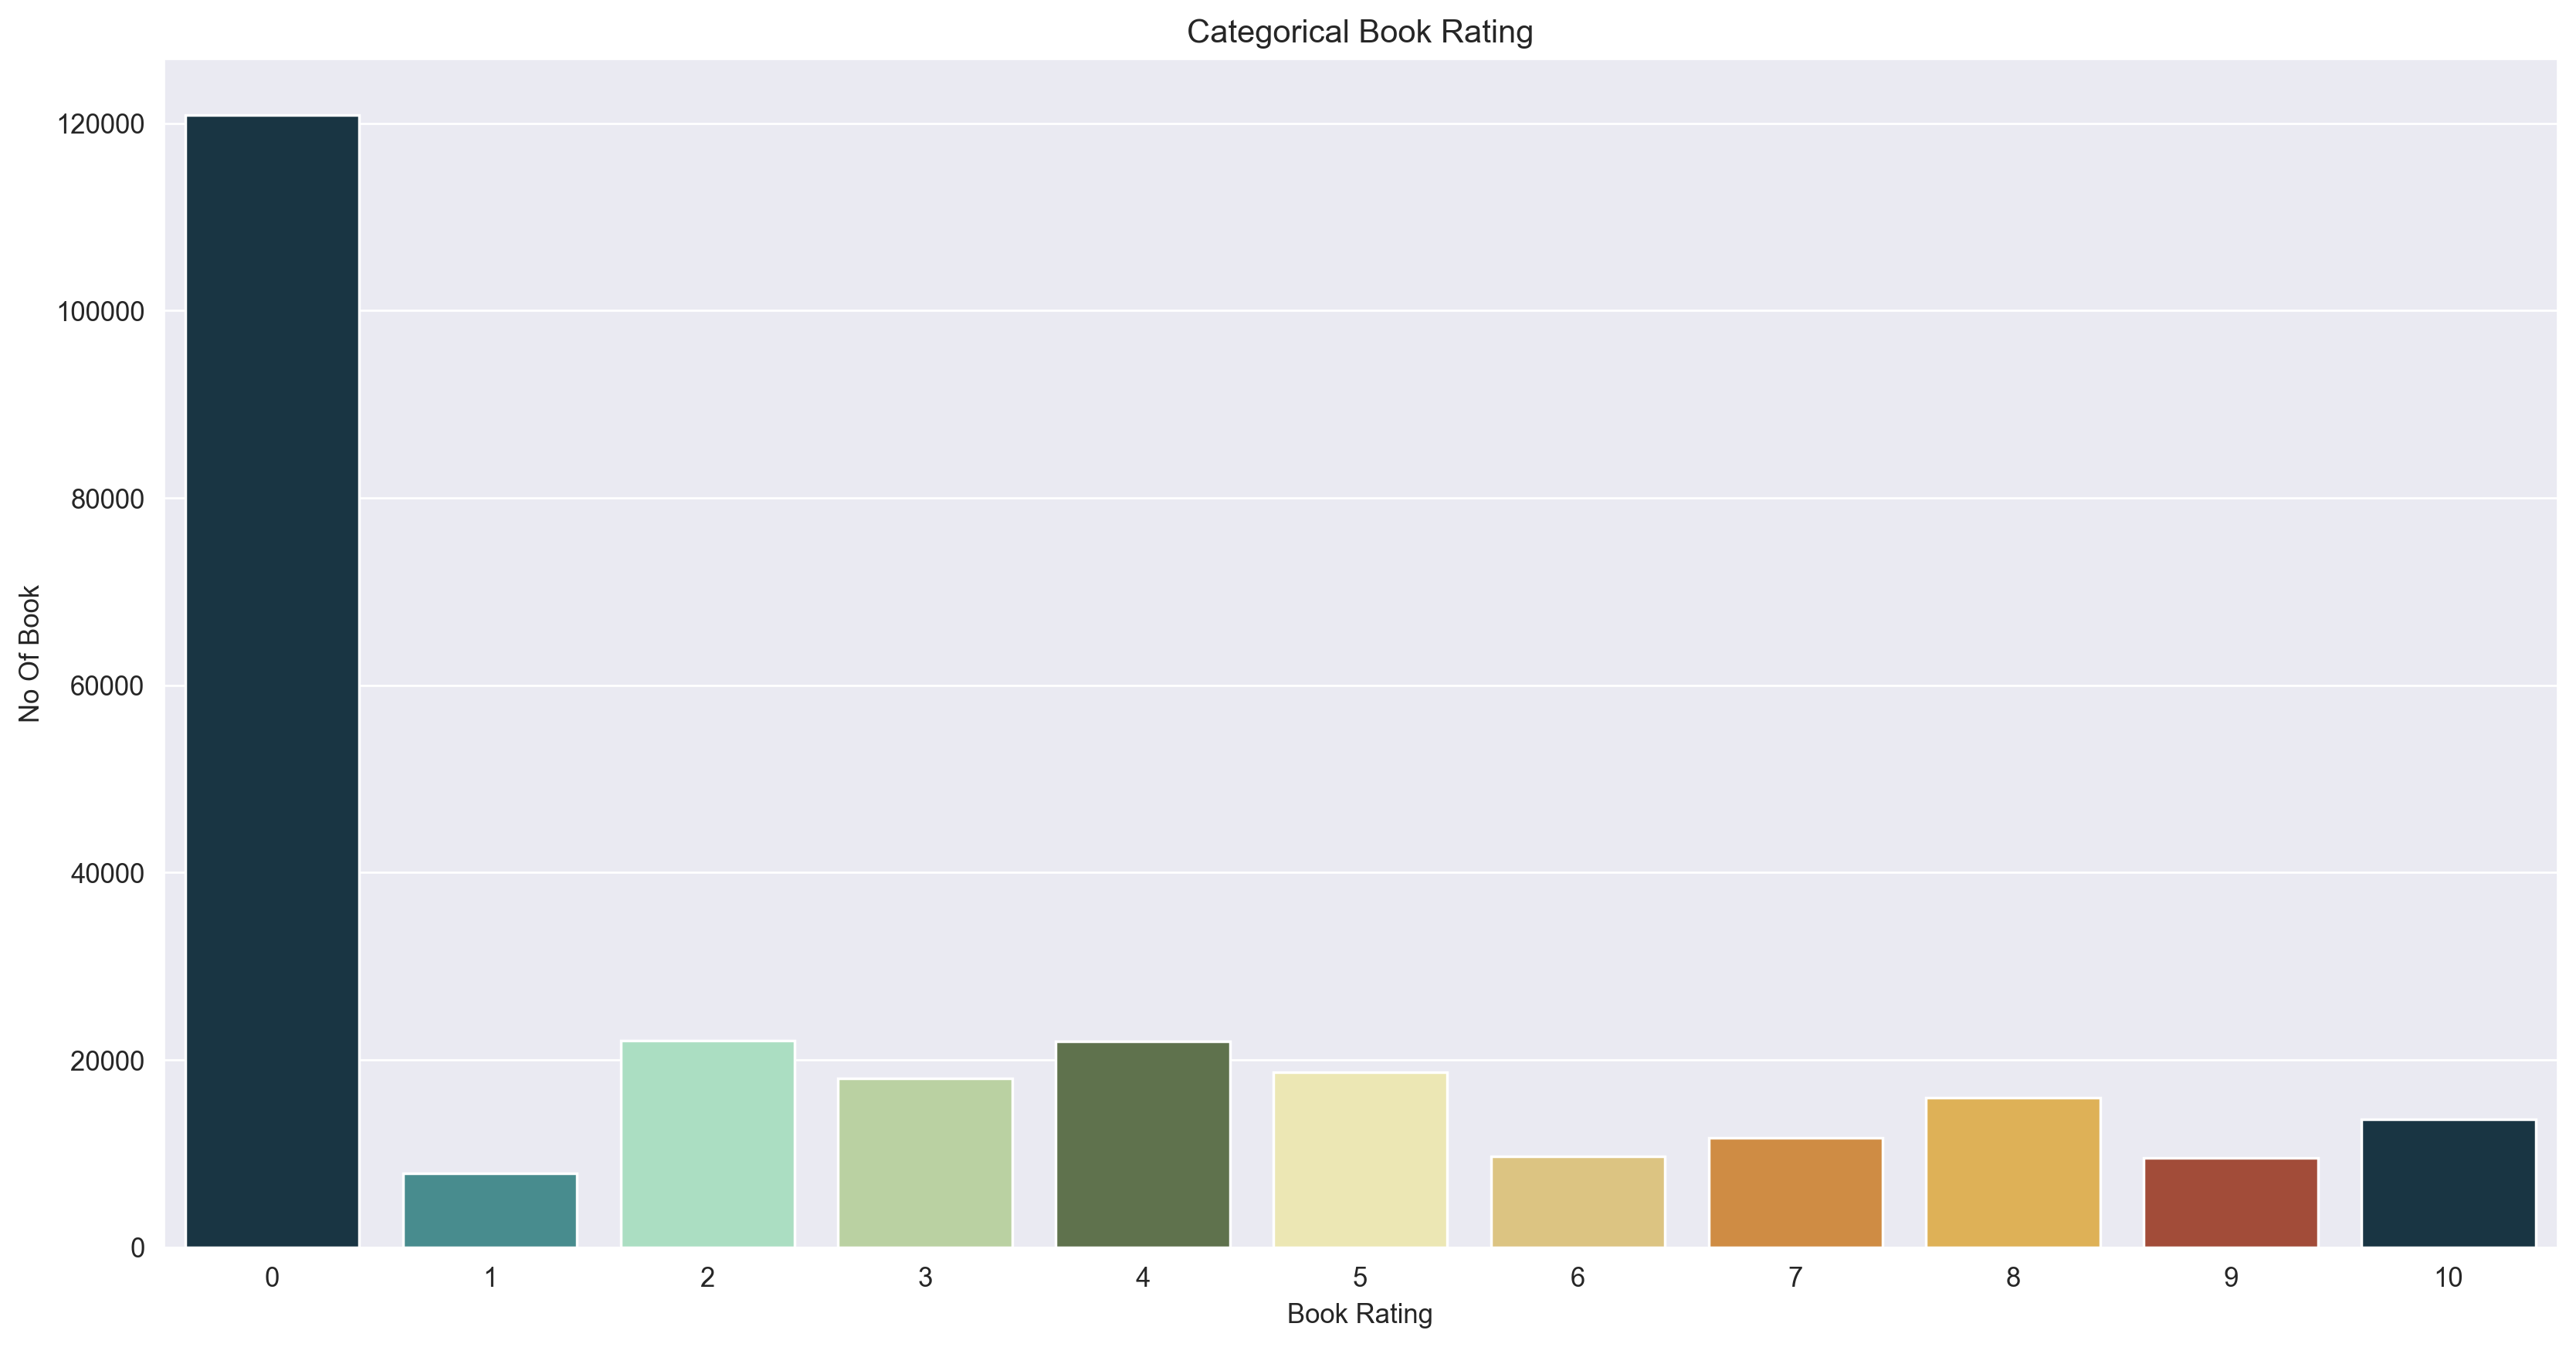

In [66]:
plt.title('Categorical Book Rating')
plt.xlabel('Book Rating')
plt.ylabel ('No Of Book')
sns.barplot(x = rate['rating'].value_counts().index,
            y = rate['rating'].value_counts().values,
            palette = ['#12374a', '#3c979a', '#a3e6c1', '#bad99a', '#5f7847', '#f5efab', '#ebcb73', '#e68d2d', '#f5b840', '#b34127'])

##### Ploting Publishers and Their Market Share

<AxesSubplot:title={'center':"Each Publisher's Market Share"}, ylabel='Publisher'>

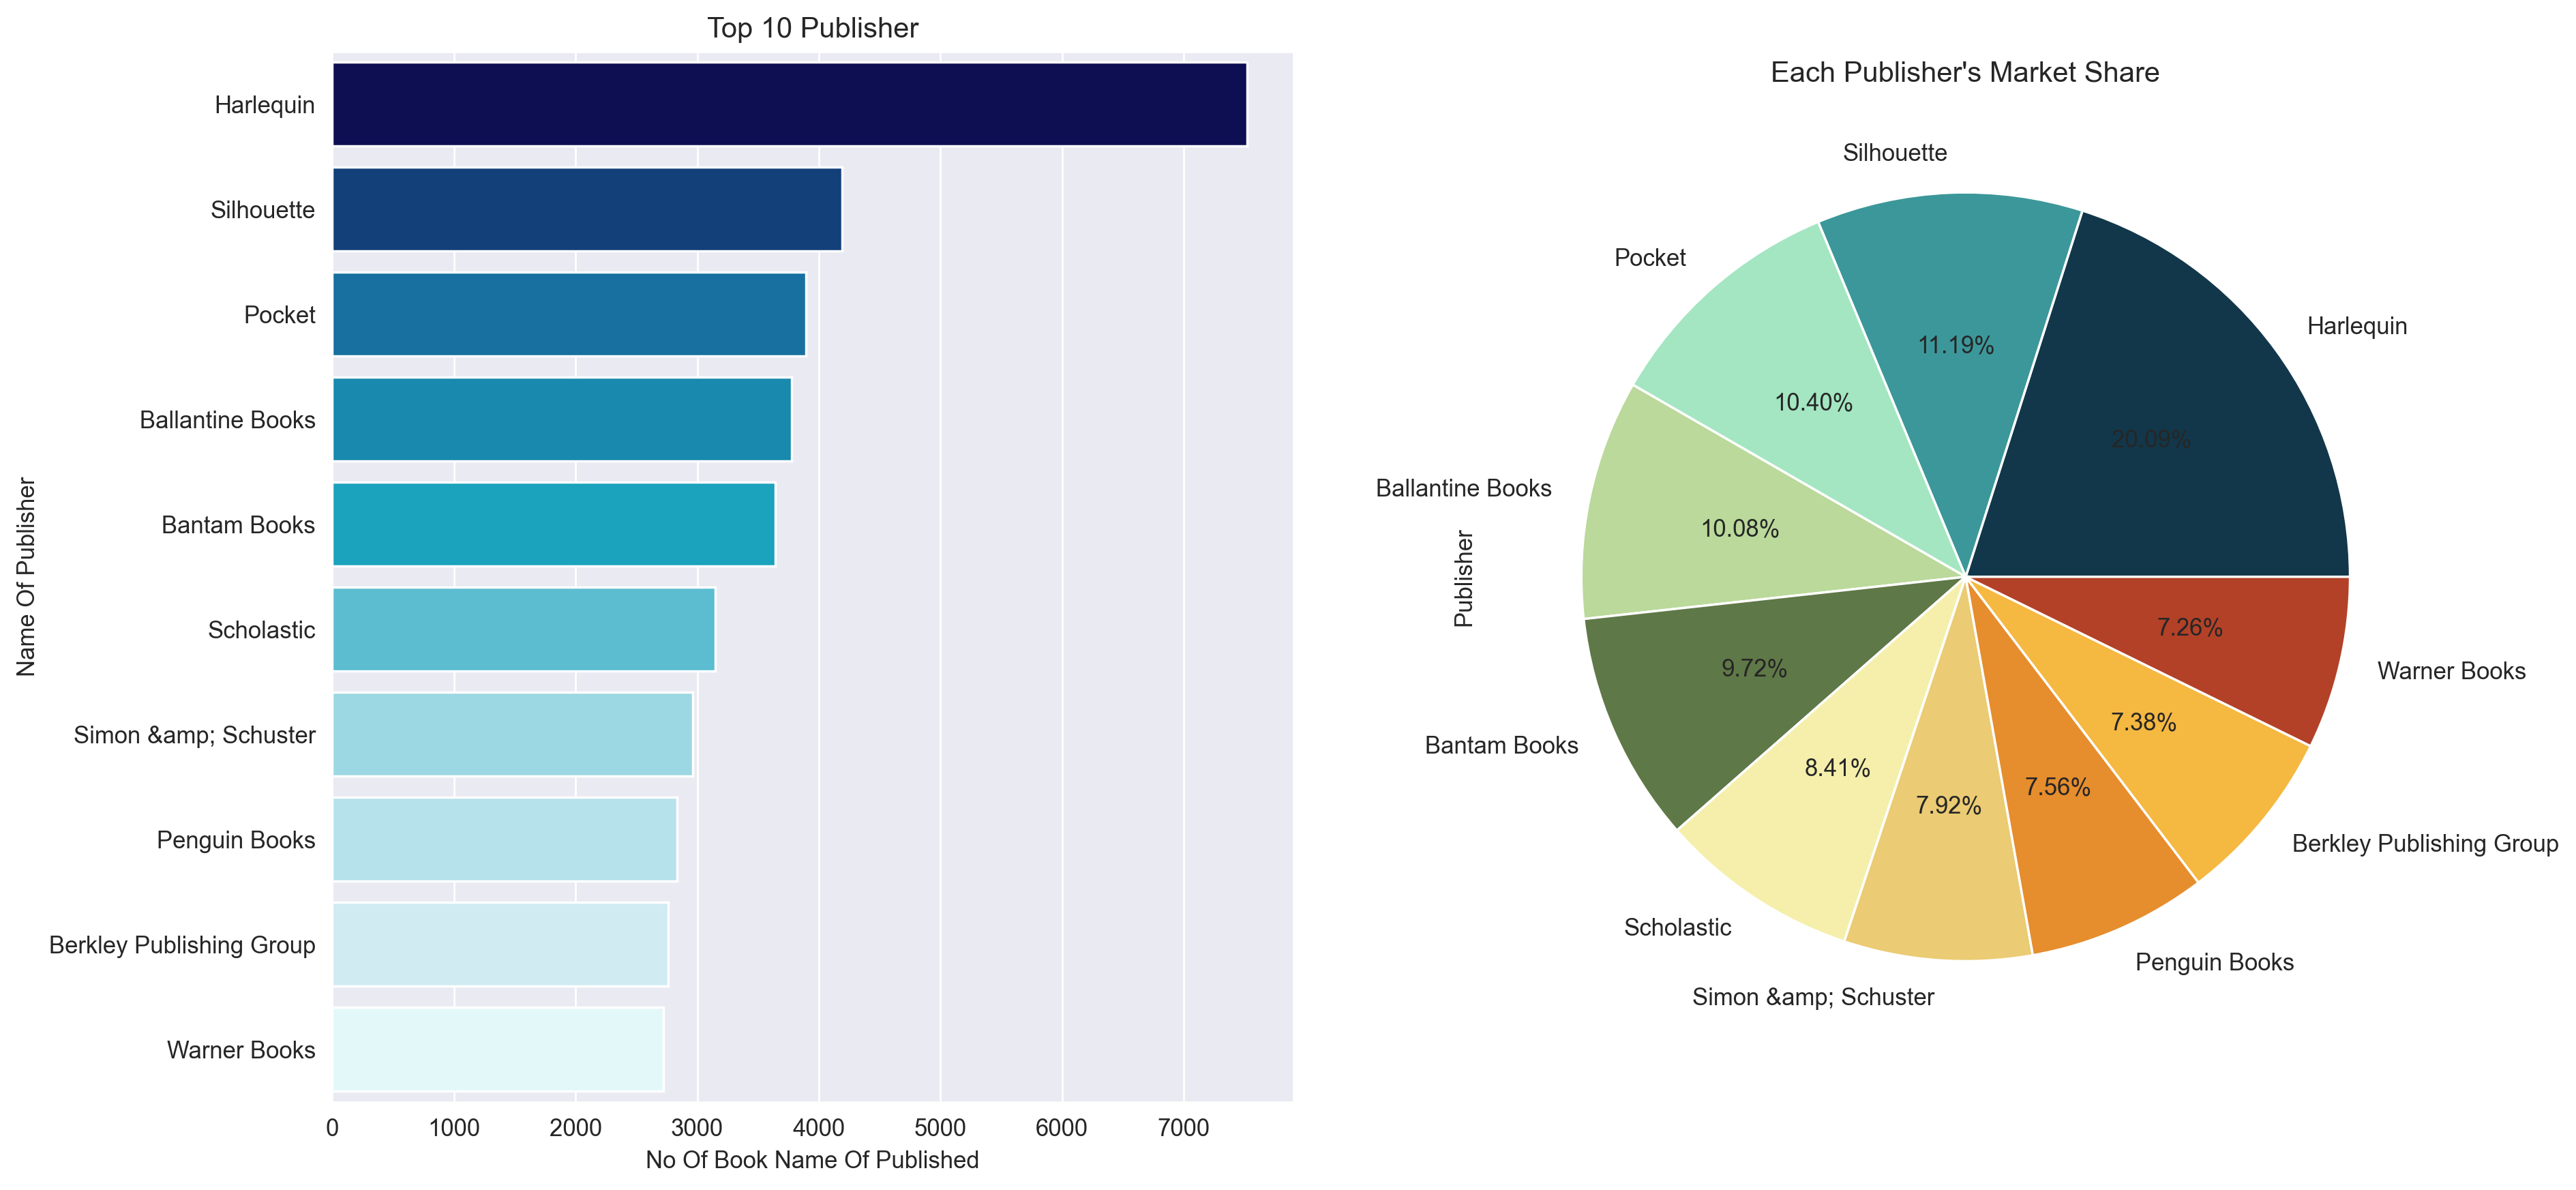

In [169]:
fig, ax = plt.subplots(ncols = 2)

plt.setp(ax[0], title = 'Top 10 Publisher')
plt.setp(ax[0], xlabel = 'No Of Book Name Of Published')
plt.setp(ax[0], ylabel = 'Name Of Publisher')
sns.barplot(y = rate['Publisher'].value_counts().head(10).index, x = rate['Publisher'].value_counts().head(10).values, ax = ax[0],
            palette = ['#03045e', '#023e8a', '#0077b6', '#0096c7', '#00b4d8', '#48cae4', '#90e0ef', '#ade8f4', '#caf0f8', '#e0fbfc'])

plt.setp(ax[1], title = "Each Publisher's Market Share")
rate['Publisher'].value_counts().head(10).plot(kind='pie', autopct = '%.2f%%', ax = ax[1],
                                                colors=['#12374a', '#3c979a', '#a3e6c1', '#bad99a', '#5f7847', '#f5efab', '#ebcb73', '#e68d2d', '#f5b840', '#b34127'])

<AxesSubplot:>

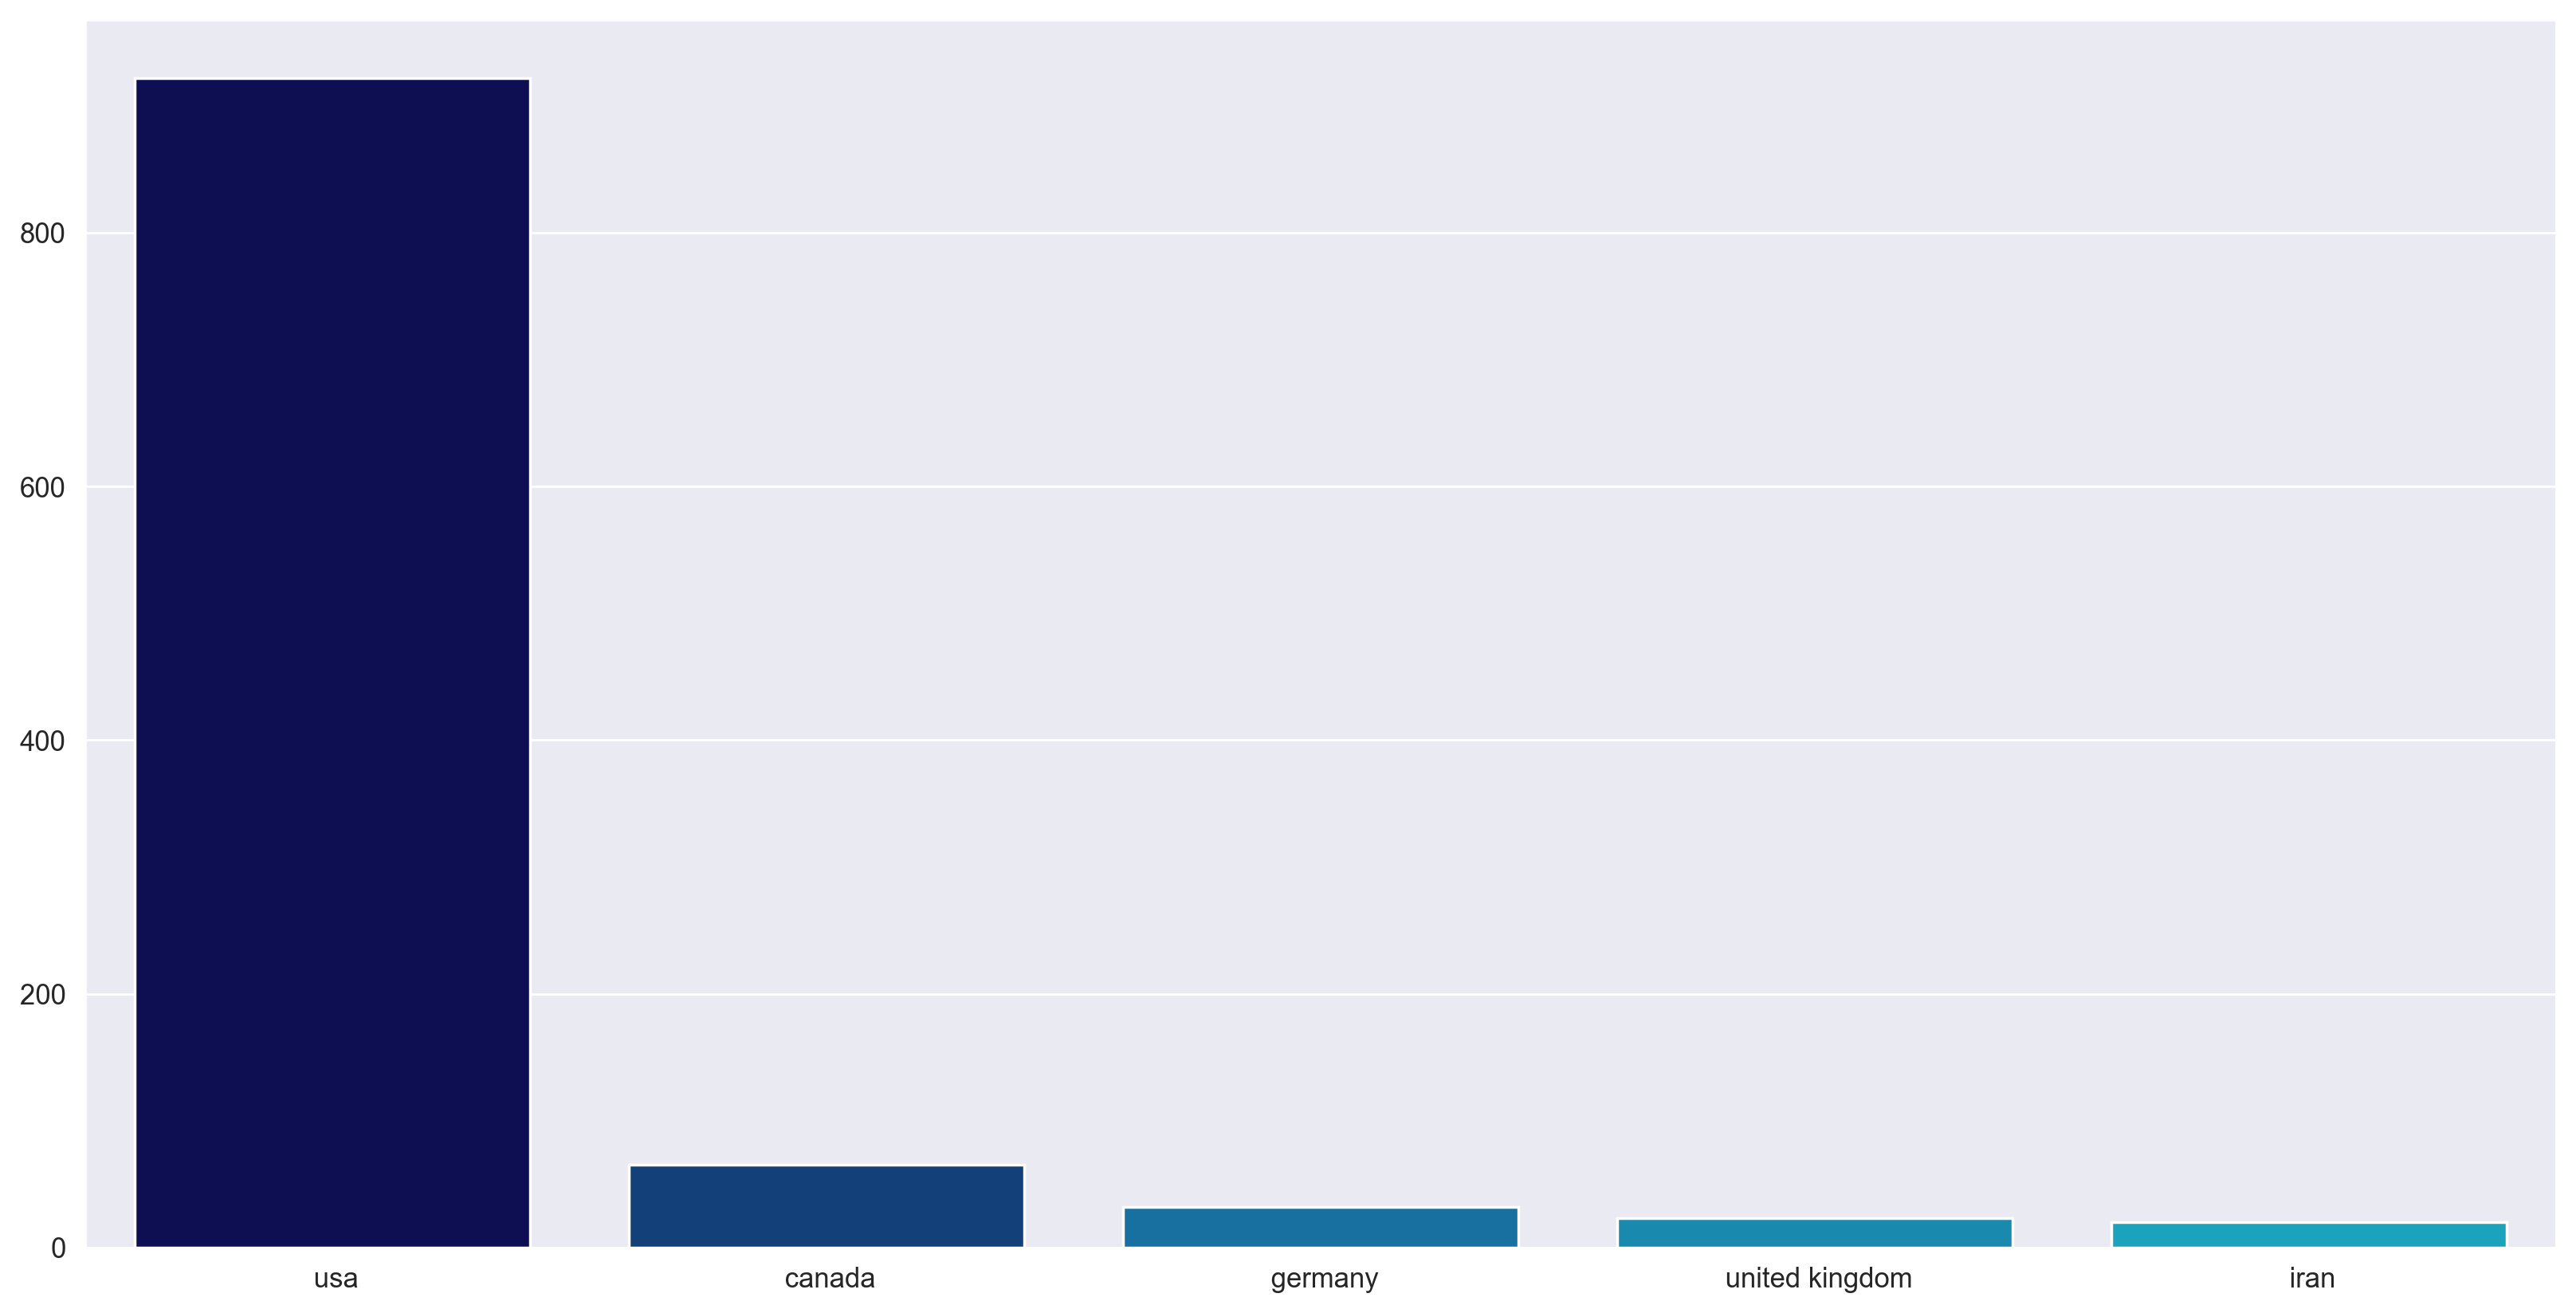

In [340]:
sns.barplot(x = Silhouette_user_list['country'].value_counts().head(5).index,
            y = Silhouette_user_list['country'].value_counts().head(5).values,
            palette = ['#03045e', '#023e8a', '#0077b6', '#0096c7', '#00b4d8', '#48cae4', '#90e0ef', '#ade8f4', '#caf0f8', '#e0fbfc'])

<AxesSubplot:xlabel='rating', ylabel='Author'>

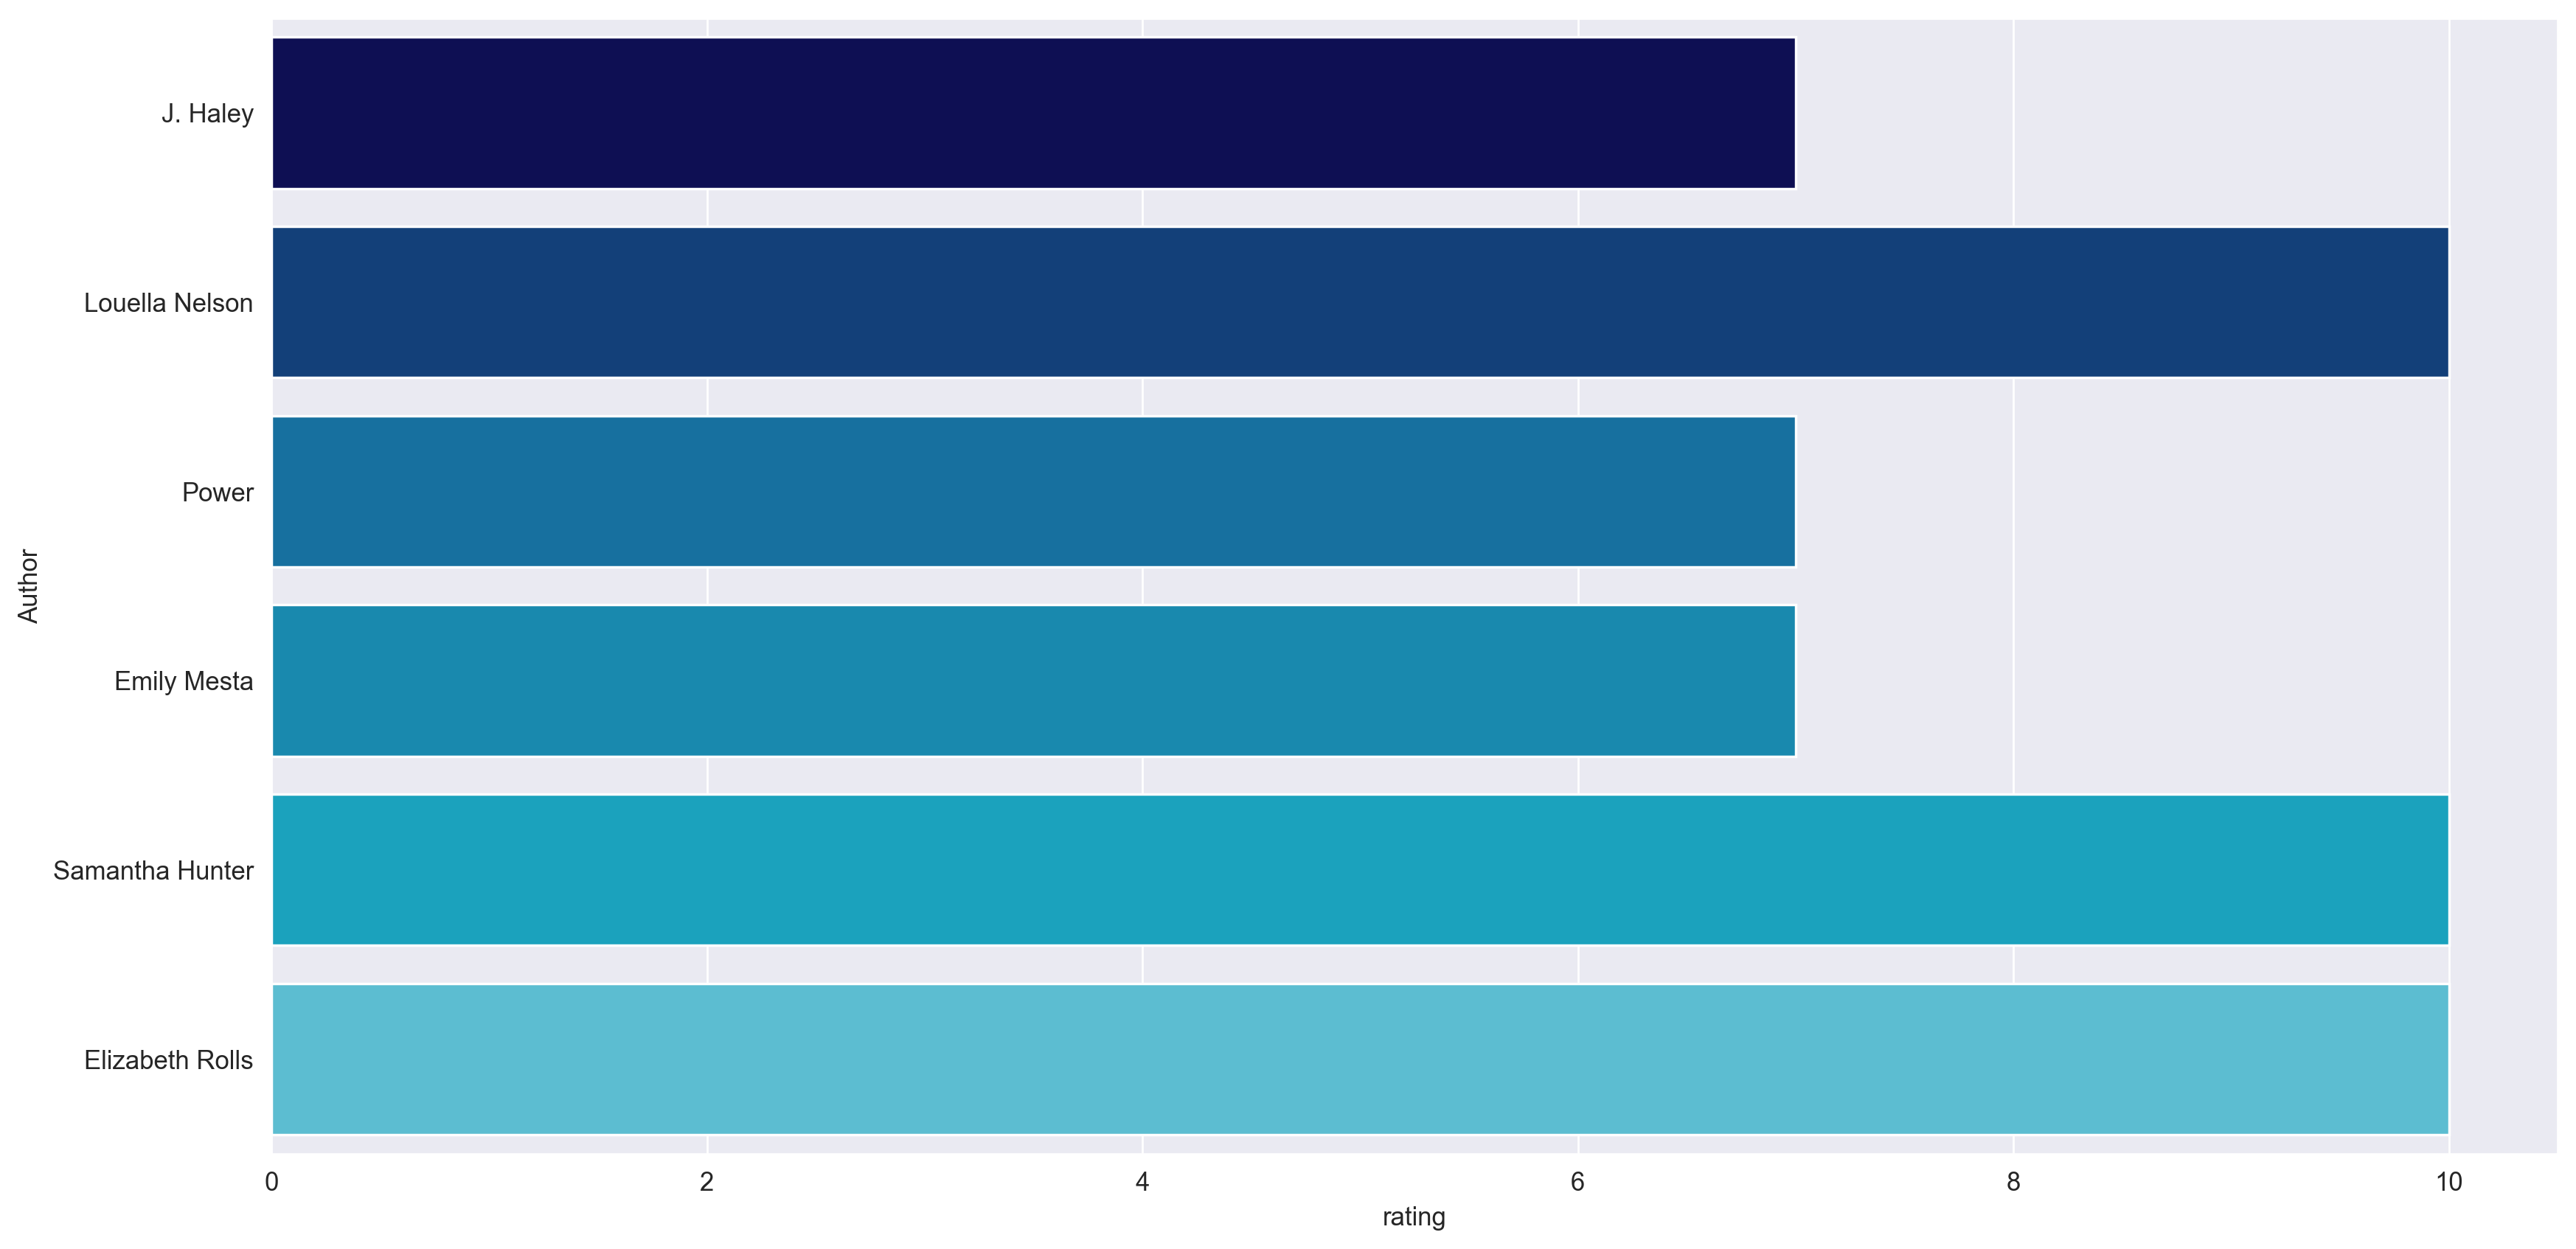

In [359]:
sns.barplot(x = Harlequin_Author_Ranking[Harlequin_Author_Ranking['rating'] >= 7].iloc[:,1],
            y = Harlequin_Author_Ranking[Harlequin_Author_Ranking['rating'] >= 7].iloc[:,0],
            palette = ['#03045e', '#023e8a', '#0077b6', '#0096c7', '#00b4d8', '#48cae4']
            )

In [ ]:
what why how